# Preliminary ML Model Results (with Feature Scaling)

In [46]:
import pandas as pd
import numpy as np
import xgboost
import seaborn as sns

import matplotlib.pyplot as plt

import plotly

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

In [47]:
labels = pd.read_csv('Patient class labels.csv')
labels.head()

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1


In [48]:
features = pd.read_csv('pyradiomics_extraction.csv')
features.head()

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,Breast_MRI_001,pre,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,2.305556e+00,1.440972e-01,1.750000e+00,0.000285,8.618192e+07,5.497338,0.091060,0.000782,3.011166e-07,0.092604
1,Breast_MRI_001,post_1,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,1.267982e-09,1.267982e-09,-3.203427e-16,0.000036,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
2,Breast_MRI_002,pre,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,4.661186e-01,4.661186e-01,2.978075e+00,0.005367,2.374784e+06,288.409155,0.001006,0.127011,1.063641e-02,0.001006
3,Breast_MRI_002,post_1,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,6.046485e-01,6.046485e-01,1.943752e+00,0.001278,1.153687e+07,13.650935,0.018427,0.006934,2.849699e-05,0.018260
4,Breast_MRI_003,pre,0.934408,0.286810,13.808210,48.144081,43.126056,40.488107,56.606869,57.665740,...,1.337012e+00,2.120119e-01,2.846439e+00,0.000240,1.041128e+08,1140.457544,0.000980,0.048920,7.407411e-03,0.000972


In [49]:
pre_features = features[features['sequence'] == 'pre']
total_features = pd.merge(pre_features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')

In [50]:
total_features

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,pre,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,8.618192e+07,5.497338,0.091060,0.000782,3.011166e-07,0.092604,0,0,1,2
1,Breast_MRI_002,pre,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,2.374784e+06,288.409155,0.001006,0.127011,1.063641e-02,0.001006,0,0,0,3
2,Breast_MRI_003,pre,0.934408,0.286810,13.808210,48.144081,43.126056,40.488107,56.606869,57.665740,...,1.041128e+08,1140.457544,0.000980,0.048920,7.407411e-03,0.000972,1,1,0,0
3,Breast_MRI_004,pre,0.707826,0.609522,8.893590,14.591090,14.972284,11.420813,14.477716,16.540987,...,9.257838e+04,13.834676,0.018998,0.059076,1.871148e-03,0.018887,1,1,0,0
4,Breast_MRI_005,pre,0.679296,0.424353,22.534695,53.103672,49.674566,55.175581,36.443449,58.274413,...,5.935692e+06,1166.081998,0.000341,0.127535,2.374788e-02,0.000341,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,pre,0.877153,0.648783,29.186299,44.986213,41.977361,45.886501,51.383808,56.811793,...,2.595984e+07,347.559346,0.000763,0.039988,1.473374e-03,0.000761,1,1,0,0
918,Breast_MRI_919,pre,0.964239,0.648439,13.914028,21.457727,21.084250,21.631462,25.375225,27.677709,...,1.102838e+07,4.555260,0.110201,0.002182,3.016729e-06,0.105313,1,1,0,0
919,Breast_MRI_920,pre,0.877183,0.856791,15.749673,18.382163,20.649190,19.038279,20.505122,24.348411,...,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000,1,1,0,0
920,Breast_MRI_921,pre,0.913000,0.800835,33.226543,41.489900,45.448460,43.076382,48.143552,55.603011,...,1.360858e+07,6049.519483,0.000420,0.102645,2.014567e-02,0.000420,1,1,0,0


## Data Processing and Feature Selection: TODO

# Training

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [52]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

SEED = 2454259

In [53]:
def train_test_val_splits(df, train_ratio = 0.8, val_ratio = 0.2, random_state = 2454259):
   
    val_ratio_adj = val_ratio / (1-train_ratio)

    train_df, val_df = train_test_split(df, train_size = train_ratio, random_state= random_state)
    val_df, test_df = train_test_split(val_df, train_size = val_ratio_adj, random_state= random_state)

    print(len(train_df))

    return train_df, val_df, test_df


In [54]:
train_df, val_df, test_df = train_test_val_splits(total_features.drop(columns = ['sequence', 'patient']), TRAIN_RATIO, VAL_RATIO, random_state = SEED)
len(train_df), len(val_df), len(test_df)

553


(553, 184, 185)

In [55]:
train_x, train_y_er, train_y_pr, train_y_her, train_y_mol_subtype = train_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), train_df['ER'], train_df['PR'], train_df['HER2'], train_df['Mol Subtype']
val_x, val_y_er, val_y_pr, val_y_her, val_y_mol_subtype = val_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), val_df['ER'], val_df['PR'], val_df['HER2'], val_df['Mol Subtype']
test_x, test_y_er, test_y_pr, test_y_her, test_y_mol_subtype = test_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), test_df['ER'], test_df['PR'], test_df['HER2'], test_df['Mol Subtype']

### Class distribution in the train, val and test splits

In [56]:
print("Train ER neg: {}, pos: {}\nVal ER neg: {}, pos: {}\nTest ER neg: {}, pos: {}".format(train_y_er.value_counts()[0], train_y_er.value_counts()[1],
                                                                                           val_y_er.value_counts()[0]    , val_y_er.value_counts()[1],
                                                                                           test_y_er.value_counts()[0]   , test_y_er.value_counts()[1])
)

Train ER neg: 139, pos: 414
Val ER neg: 46, pos: 138
Test ER neg: 51, pos: 134


In [57]:
print("Train PR neg: {}, pos: {}\nVal PR neg: {}, pos: {}\nTest PR neg: {}, pos: {}".format(train_y_pr.value_counts()[0]  , train_y_pr.value_counts()[1],
                                                                                           val_y_pr.value_counts()[0]    , val_y_pr.value_counts()[1],
                                                                                           test_y_pr.value_counts()[0]   , test_y_pr.value_counts()[1])
)

Train PR neg: 194, pos: 359
Val PR neg: 66, pos: 118
Test PR neg: 64, pos: 121


In [58]:
print("Train HER neg: {}, pos: {}\nVal HER neg: {}, pos: {}\nTest HER neg: {}, pos: {}".format(
                                                                                           train_y_her.value_counts()[0]  , train_y_her.value_counts()[1],
                                                                                           val_y_her.value_counts()[0]    , val_y_her.value_counts()[1],
                                                                                           test_y_her.value_counts()[0]   , test_y_her.value_counts()[1])
)

Train HER neg: 452, pos: 101
Val HER neg: 153, pos: 31
Test HER neg: 154, pos: 31


In [59]:
def train_pipeline(model, trainx, trainy, valx, valy):
    model.fit(trainx, trainy)
    preds = model.predict(trainx)
    preds_val = model.predict(valx)

    acc_train, acc_val = accuracy_score(trainy, preds), accuracy_score(valy, preds_val)
    prec_train, prec_val = precision_score(trainy, preds, average = 'weighted'), precision_score(valy, preds_val, average = 'weighted')
    rec_train, rec_val = recall_score(trainy, preds, average = 'weighted'), recall_score(valy, preds_val, average = 'weighted')
    f1_train, f1_val = f1_score(trainy, preds, average = 'weighted'), f1_score(valy, preds_val, average = 'weighted')

    metrics = {'train_acc' : acc_train, 'val_acc' : acc_val,
               'train_prec': prec_train, 'val_prec': prec_val,
               'train_rec' : rec_train,  'val_rec' : rec_val,
               'train_f1' : f1_train, 'val_f1': f1_val}


    print("Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train, acc_val))
    print("Training Precision: {:.4f}, Validation Precision: {:.4f}".format(prec_train, prec_val))
    print("Training Recall: {:.4f}, Validation Recall: {:.4f}".format(rec_train, rec_val))
    print("Training F1-Score: {:.4f}, Validation F1-Score: {:.4f}".format(f1_train, f1_val))

    return model, metrics

In [60]:
def get_classification_report(model, trainx, trainy, valx, valy, testx, testy, class_names, title, subtype = None):
    model, metrics = train_pipeline(model, trainx, trainy, valx, valy)
    pred = model.predict(testx)


    acc_test = accuracy_score(testy, pred)
    prec_test = precision_score(testy, pred, average = 'weighted')
    rec_test = recall_score(testy, pred, average = 'weighted')
    f1_test = f1_score(testy, pred, average = 'weighted')
    
    metrics.update(
            {'test_acc' : acc_test,
            'test_prec': prec_test,
            'test_rec' : rec_test,
            'test_f1' : f1_test})

    if len(trainy.unique()) == 2 and not isinstance(model, SVC):
        probs = model.predict_proba(test_x)
        aucroc = roc_auc_score(testy, probs[:, 1], average = 'weighted')
        metrics.update({'test_aucroc' : aucroc})

    cls_report = classification_report(testy, pred, target_names = class_names, output_dict = True)
    sns.heatmap(pd.DataFrame(cls_report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    return metrics, model

## Classifications

In [61]:
classification_results = pd.DataFrame()

## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler()

In [64]:
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

## Models

### Naive Bayes

Training Accuracy: 0.7197, Validation Accuracy: 0.7283
Training Precision: 0.6720, Validation Precision: 0.6810
Training Recall: 0.7197, Validation Recall: 0.7283
Training F1-Score: 0.6842, Validation F1-Score: 0.6912


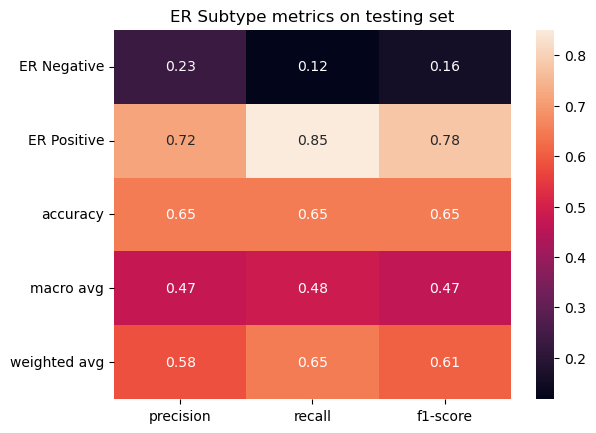

In [65]:
nb_er = GaussianNB()
report, nb_er = get_classification_report(nb_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set', subtype = 'ER')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6528, Validation Accuracy: 0.6467
Training Precision: 0.6176, Validation Precision: 0.6141
Training Recall: 0.6528, Validation Recall: 0.6467
Training F1-Score: 0.5984, Validation F1-Score: 0.5933


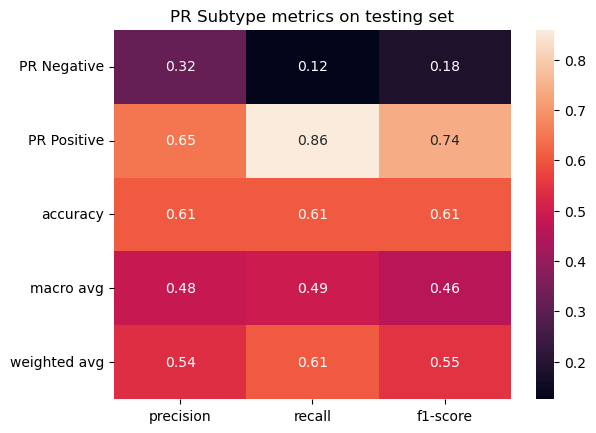

In [66]:
nb_pr = GaussianNB()
report, nb_pr = get_classification_report(nb_er, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.2061, Validation Accuracy: 0.2500
Training Precision: 0.6008, Validation Precision: 0.6347
Training Recall: 0.2061, Validation Recall: 0.2500
Training F1-Score: 0.1984, Validation F1-Score: 0.2822


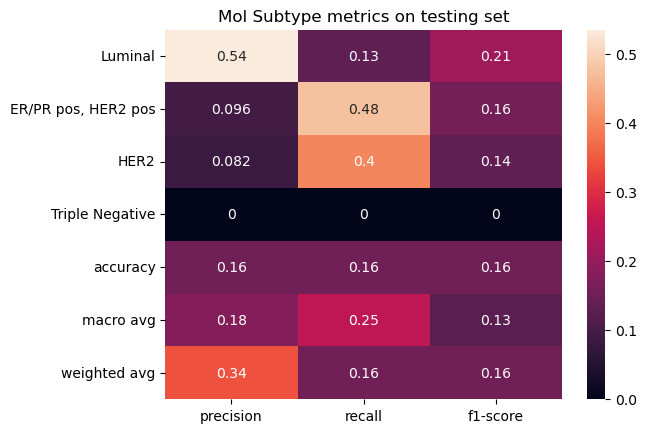

In [67]:
nb_mol_subtype = GaussianNB()
report, nb_mol_subtype = get_classification_report(nb_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.4792, Validation Accuracy: 0.4185
Training Precision: 0.7661, Validation Precision: 0.7261
Training Recall: 0.4792, Validation Recall: 0.4185
Training F1-Score: 0.5265, Validation F1-Score: 0.4748


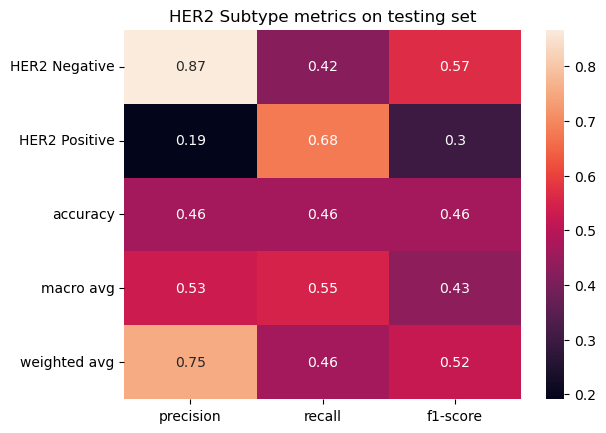

In [68]:
nb_her2 = GaussianNB()
report, nb_her2 = get_classification_report(nb_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### Logistic Regression

Training Accuracy: 0.7703, Validation Accuracy: 0.7446
Training Precision: 0.7585, Validation Precision: 0.6811
Training Recall: 0.7703, Validation Recall: 0.7446
Training F1-Score: 0.7076, Validation F1-Score: 0.6737


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


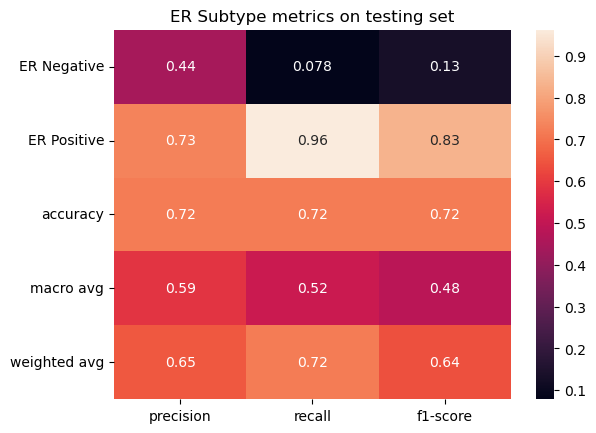

In [69]:
logreg_er = LogisticRegression()
report, logreg_er = get_classification_report(logreg_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.7233, Validation Accuracy: 0.6576
Training Precision: 0.7238, Validation Precision: 0.6323
Training Recall: 0.7233, Validation Recall: 0.6576
Training F1-Score: 0.6907, Validation F1-Score: 0.6141


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Naive Bayes,ER,0.719711,0.728261,0.671997,0.680976,0.719711,0.728261,0.684223,0.691176,0.648649,0.582944,0.648649,0.606600,0.514852
0,Naive Bayes,PR,0.652803,0.646739,0.617569,0.614058,0.652803,0.646739,0.598396,0.593302,0.605405,0.535838,0.605405,0.546332,0.479726
0,Naive Bayes,Mol Subtype,0.206148,0.250000,0.600844,0.634702,0.206148,0.250000,0.198385,0.282202,0.156757,0.342547,0.156757,0.155451,NaN
0,Naive Bayes,HER2,0.479204,0.418478,0.766070,0.726059,0.479204,0.418478,0.526477,0.474774,0.464865,0.753432,0.464865,0.522474,0.595098
0,Logistic Regression,ER,0.770344,0.744565,0.758491,0.681111,0.770344,0.744565,0.707595,0.673744,0.718919,0.653419,0.718919,0.639582,0.545800
0,Logistic Regression,PR,0.723327,0.657609,0.723761,0.632333,0.723327,0.657609,0.690687,0.614135,0.610811,0.552645,0.610811,0.559864,0.486441


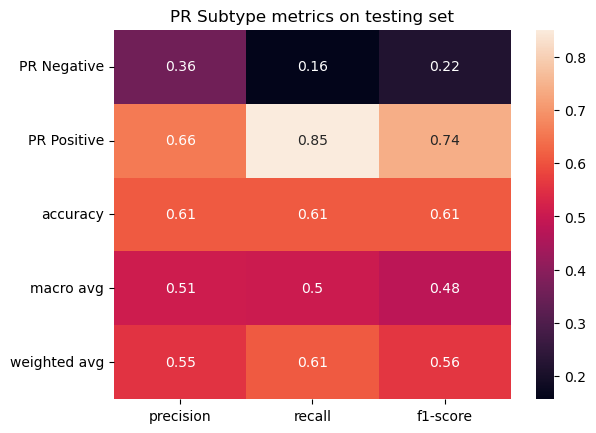

In [70]:
logreg_pr = LogisticRegression()
report, logreg_pr = get_classification_report(logreg_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

classification_results

Training Accuracy: 0.8318, Validation Accuracy: 0.8207
Training Precision: 0.8433, Validation Precision: 0.7351
Training Recall: 0.8318, Validation Recall: 0.8207
Training F1-Score: 0.7706, Validation F1-Score: 0.7587


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


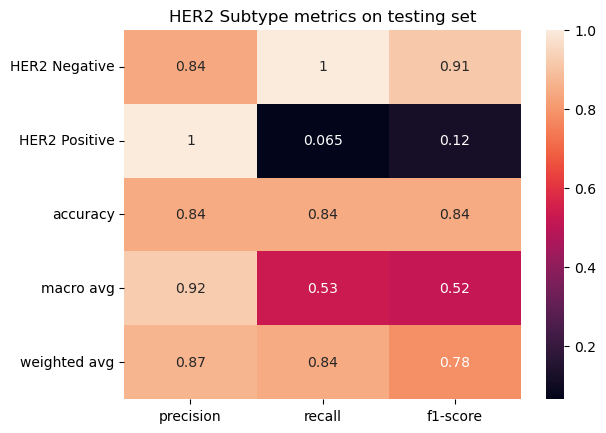

In [71]:
logreg_her2 = LogisticRegression()
report, logreg_her2 = get_classification_report(logreg_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6781, Validation Accuracy: 0.6250
Training Precision: 0.6527, Validation Precision: 0.4459
Training Recall: 0.6781, Validation Recall: 0.6250
Training F1-Score: 0.5920, Validation F1-Score: 0.5205


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


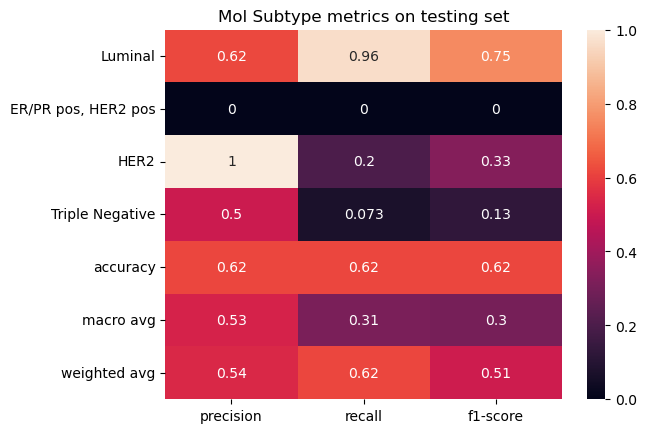

In [72]:
logreg_mol_subtype = LogisticRegression()
report, logreg_mol_subtype = get_classification_report(logreg_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### Decision Tree

Training Accuracy: 0.7685, Validation Accuracy: 0.7337
Training Precision: 0.8232, Validation Precision: 0.5594
Training Recall: 0.7685, Validation Recall: 0.7337
Training F1-Score: 0.6853, Validation F1-Score: 0.6348


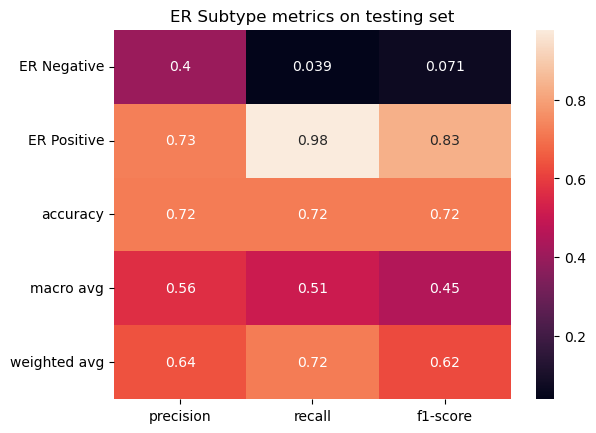

In [73]:
tree_er = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
report, tree_er = get_classification_report(tree_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.7450, Validation Accuracy: 0.6467
Training Precision: 0.7809, Validation Precision: 0.6124
Training Recall: 0.7450, Validation Recall: 0.6467
Training F1-Score: 0.7033, Validation F1-Score: 0.5784


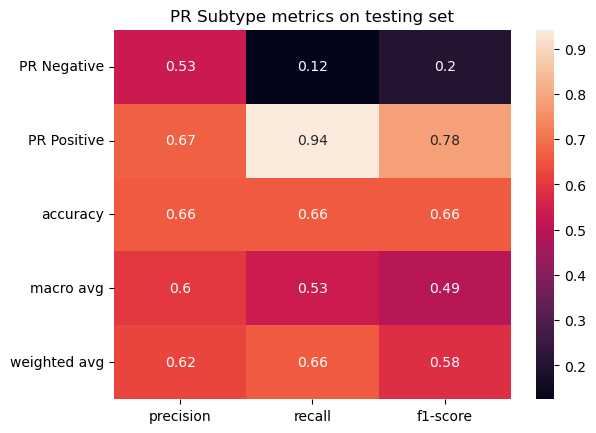

In [74]:
tree_pr = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
report, tree_pr = get_classification_report(tree_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9186, Validation Accuracy: 0.7880
Training Precision: 0.9182, Validation Precision: 0.7853
Training Recall: 0.9186, Validation Recall: 0.7880
Training F1-Score: 0.9121, Validation F1-Score: 0.7867


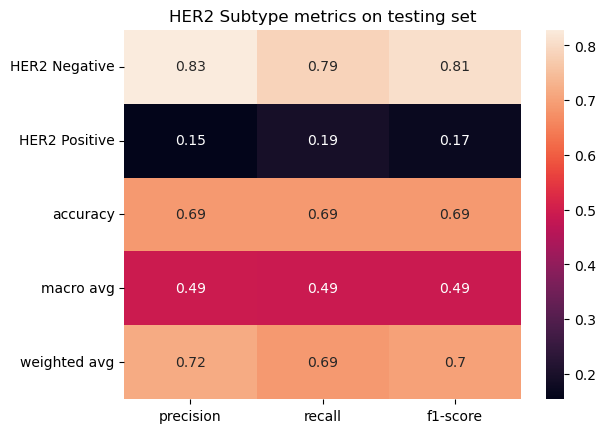

In [75]:
tree_her2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 8)
report, tree_her2 = get_classification_report(tree_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.7269, Validation Accuracy: 0.5924
Training Precision: 0.7466, Validation Precision: 0.4871
Training Recall: 0.7269, Validation Recall: 0.5924
Training F1-Score: 0.6626, Validation F1-Score: 0.5243


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\e

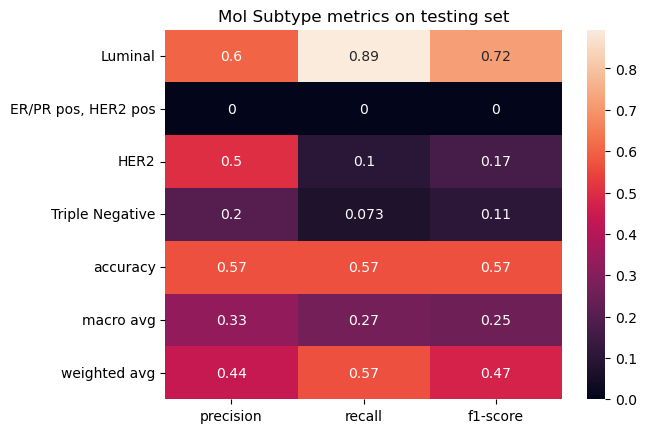

In [76]:
tree_mol_subtype = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 8)
report, tree_mol_subtype = get_classification_report(tree_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### RandomForest

Training Accuracy: 0.8228, Validation Accuracy: 0.7446
Training Precision: 0.8567, Validation Precision: 0.6749
Training Recall: 0.8228, Validation Recall: 0.7446
Training F1-Score: 0.7839, Validation F1-Score: 0.6664


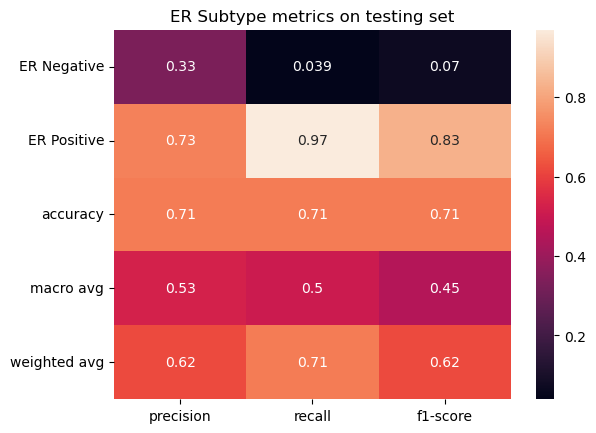

In [77]:
forest_er = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 6)
report, forest_er = get_classification_report(forest_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')


result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9910, Validation Accuracy: 0.5924
Training Precision: 0.9910, Validation Precision: 0.5692
Training Recall: 0.9910, Validation Recall: 0.5924
Training F1-Score: 0.9910, Validation F1-Score: 0.5760


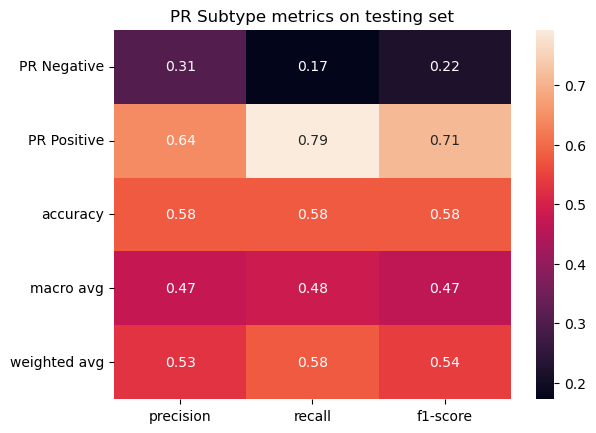

In [78]:
forest_pr = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 15)
report, forest_pr = get_classification_report(forest_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9982, Validation Accuracy: 0.8207
Training Precision: 0.9982, Validation Precision: 0.7351
Training Recall: 0.9982, Validation Recall: 0.8207
Training F1-Score: 0.9982, Validation F1-Score: 0.7587


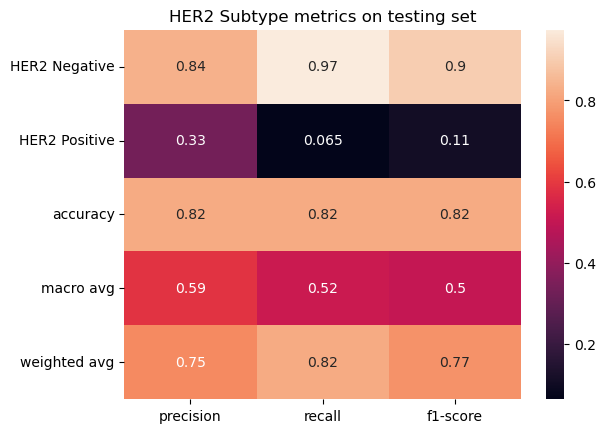

In [79]:
forest_her2 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 20)
report, forest_her2 = get_classification_report(forest_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6528, Validation Accuracy: 0.6576
Training Precision: 0.5085, Validation Precision: 0.4384
Training Recall: 0.6528, Validation Recall: 0.6576
Training F1-Score: 0.5180, Validation F1-Score: 0.5261


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-pack

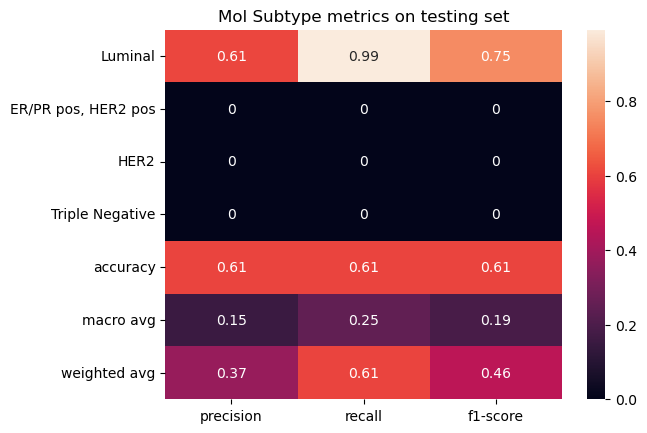

In [80]:
forest_mol_subtype = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 2)
report, forest_mol_subtype = get_classification_report(forest_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### XGBoost

Training Accuracy: 1.0000, Validation Accuracy: 0.6957
Training Precision: 1.0000, Validation Precision: 0.6401
Training Recall: 1.0000, Validation Recall: 0.6957
Training F1-Score: 1.0000, Validation F1-Score: 0.6591


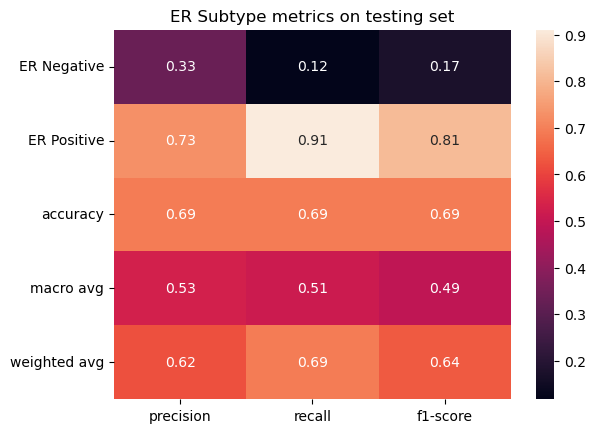

In [81]:
xgb_er = xgb.XGBClassifier(n_estimators = 20, max_depth = 10, max_leaves = 20)
report, xgb_er = get_classification_report(xgb_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9982, Validation Accuracy: 0.6033
Training Precision: 0.9982, Validation Precision: 0.5759
Training Recall: 0.9982, Validation Recall: 0.6033
Training F1-Score: 0.9982, Validation F1-Score: 0.5819


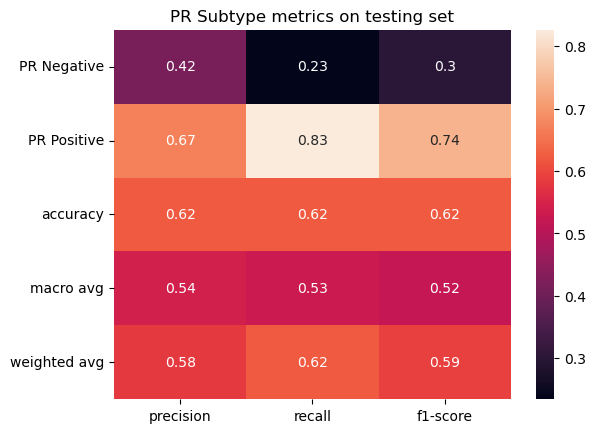

In [82]:
xgb_pr = xgb.XGBClassifier(n_estimators = 20, max_leaves = 20)
report, xgb_pr = get_classification_report(xgb_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.7880
Training Precision: 1.0000, Validation Precision: 0.7307
Training Recall: 1.0000, Validation Recall: 0.7880
Training F1-Score: 1.0000, Validation F1-Score: 0.7536


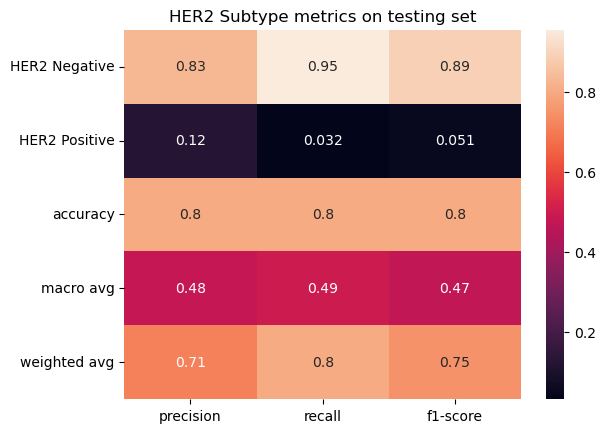

In [83]:
xgb_her2 = xgb.XGBClassifier(n_estimators = 100, max_leaves = 20)
report, nb_pr = get_classification_report(xgb_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.6196
Training Precision: 1.0000, Validation Precision: 0.5320
Training Recall: 1.0000, Validation Recall: 0.6196
Training F1-Score: 1.0000, Validation F1-Score: 0.5575


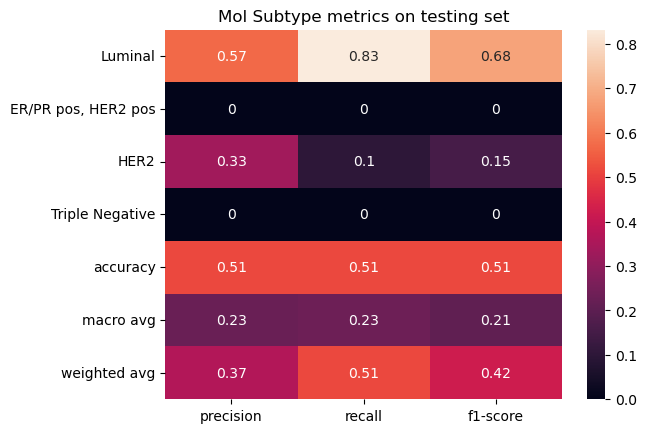

In [84]:
xgb_mol_subtype = xgb.XGBClassifier(n_estimators = 100, max_depth = 5)
report, xgb_mol_subtype = get_classification_report(xgb_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### SVM

Training Accuracy: 0.7667, Validation Accuracy: 0.7500
Training Precision: 0.8221, Validation Precision: 0.5625
Training Recall: 0.7667, Validation Recall: 0.7500
Training F1-Score: 0.6815, Validation F1-Score: 0.6429


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\

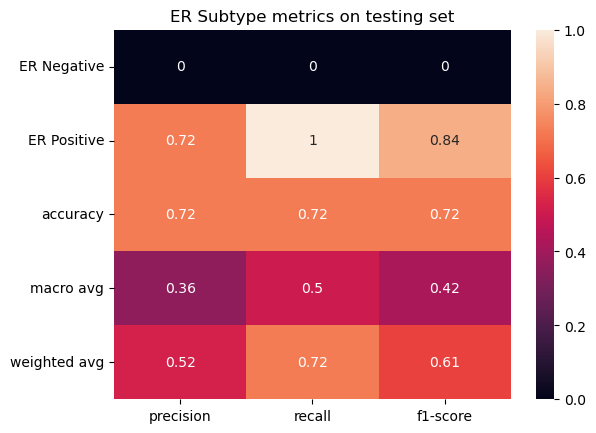

In [85]:
svm_er = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_er = get_classification_report(svm_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6998, Validation Accuracy: 0.6522
Training Precision: 0.7947, Validation Precision: 0.6571
Training Recall: 0.6998, Validation Recall: 0.6522
Training F1-Score: 0.6158, Validation F1-Score: 0.5425


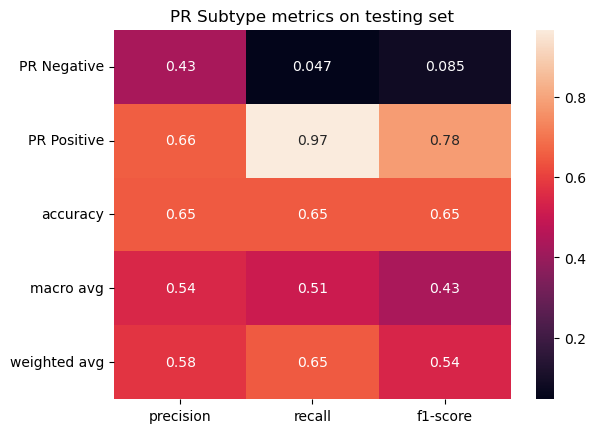

In [86]:
svm_pr = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_pr = get_classification_report(svm_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.8192, Validation Accuracy: 0.8315
Training Precision: 0.8519, Validation Precision: 0.6914
Training Recall: 0.8192, Validation Recall: 0.8315
Training F1-Score: 0.7395, Validation F1-Score: 0.7550


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\

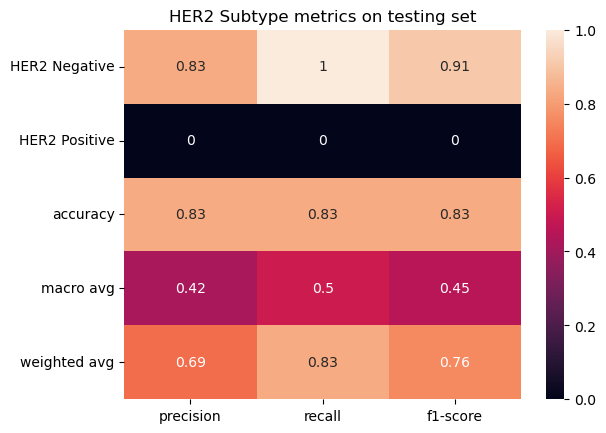

In [87]:
svm_her2 = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_her2 = get_classification_report(svm_pr, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.7396, Validation Accuracy: 0.6141
Training Precision: 0.8020, Validation Precision: 0.4638
Training Recall: 0.7396, Validation Recall: 0.6141
Training F1-Score: 0.6853, Validation F1-Score: 0.5208


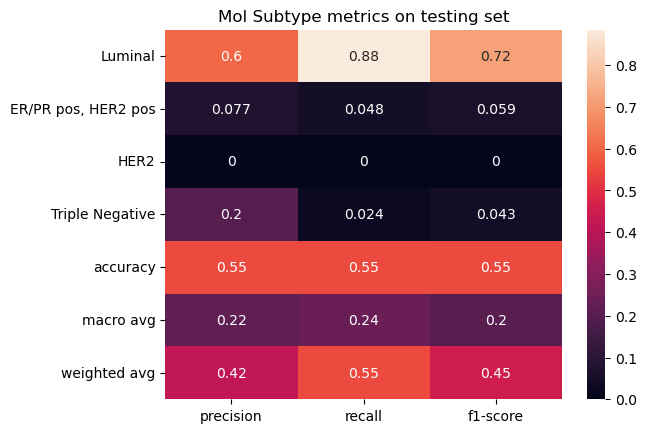

In [88]:
svm_mol_subtype = SVC(C = 2, kernel = 'poly', degree = 5, gamma = 'auto')
report, svm_mol_subtype = get_classification_report(svm_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

## Classification scores

In [89]:
classification_results.reset_index(drop = True, inplace = True)
classification_results.sort_values(by = ['Subtype', 'Algorithm'])

,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
8,Decision Tree,ER,0.768535,0.733696,0.823199,0.559392,0.768535,0.733696,0.685273,0.634796,0.718919,0.637417,0.718919,0.624064,0.487782
4,Logistic Regression,ER,0.770344,0.744565,0.758491,0.681111,0.770344,0.744565,0.707595,0.673744,0.718919,0.653419,0.718919,0.639582,0.545800
0,Naive Bayes,ER,0.719711,0.728261,0.671997,0.680976,0.719711,0.728261,0.684223,0.691176,0.648649,0.582944,0.648649,0.606600,0.514852
12,Random Forest,ER,0.822785,0.744565,0.856705,0.674939,0.822785,0.744565,0.783920,0.666397,0.713514,0.617937,0.713514,0.621021,0.538045
20,SVM,ER,0.766727,0.750000,0.822145,0.562500,0.766727,0.750000,0.681468,0.642857,0.724324,0.524646,0.724324,0.608523,NaN
16,XGBoost,ER,1.000000,0.695652,1.000000,0.640104,1.000000,0.695652,1.000000,0.659060,0.691892,0.621039,0.691892,0.635104,0.490342
10,Decision Tree,HER2,0.918626,0.788043,0.918159,0.785307,0.918626,0.788043,0.912114,0.786651,0.686486,0.715672,0.686486,0.700221,0.502095
6,Logistic Regression,HER2,0.831826,0.820652,0.843251,0.735054,0.831826,0.820652,0.770581,0.758746,0.843243,0.868084,0.843243,0.781110,0.437997
3,Naive Bayes,HER2,0.479204,0.418478,0.766070,0.726059,0.479204,0.418478,0.526477,0.474774,0.464865,0.753432,0.464865,0.522474,0.595098
14,Random Forest,HER2,0.998192,0.820652,0.998196,0.735054,0.998192,0.820652,0.998188,0.758746,0.821622,0.753425,0.821622,0.768055,0.450356


In [90]:
classification_results.to_csv("Classification results/With feature scaling results.csv", index = False)